In [7]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
import sys
sys.path.append("/home/miri/Documents/bachelorthesis/plots")
from plot_utils import *

Max test accuracy of Standard is 85.8% with sqrt(lr) 0.025
Max test accuracy of norm is 85.87% with param 0.15
Max test accuracy of gcstdu is 86.02% with param 0.15
Max test accuracy of wd is 82.83% with lambda 0.002


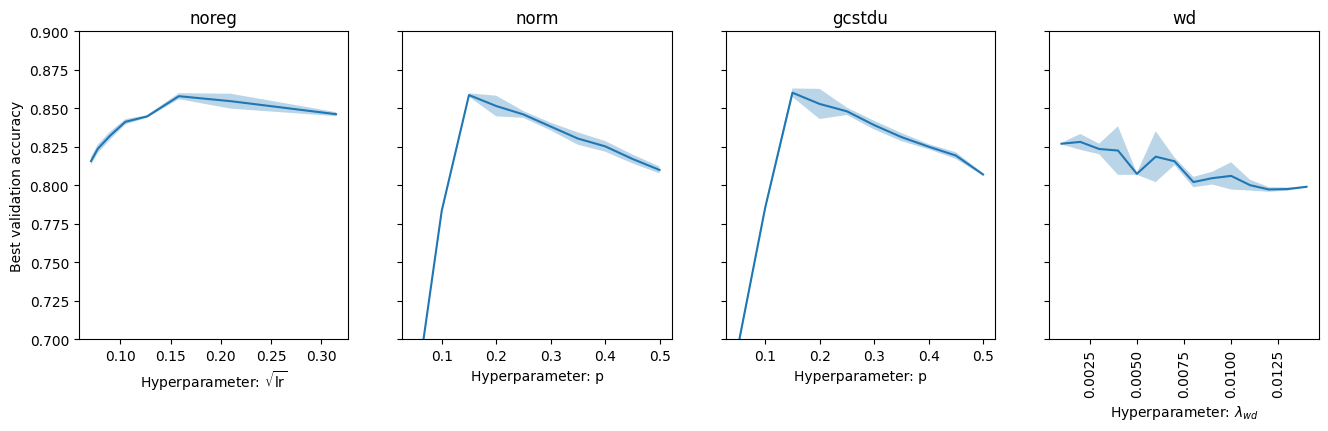

In [9]:
fig,axs = plt.subplots(ncols=4,nrows=1,sharey="row")
fig.set_size_inches(16,4)
axs[0].set_ylim(0.7,0.9) 

x,y,_ = plot_hyperparam_y(get_subexpspaths("../../data/sgdm_wbn/standard"),
                               lambda subpath: np.sqrt(float(subpath)),lambda p : max_acc(get_stats(p,"test_stats")),axs[0], norm=False)
axs[0].set_title("noreg")
axs[0].set_ylabel("Best validation accuracy")
axs[0].set_xlabel(r"Hyperparameter: $\sqrt{\text{lr}}$")

print("Max test accuracy of Standard is {0}% with sqrt(lr) {1}".format(round(100*y.max(),2),round(x[y.argmax()]**2,5)))

x,y,_ = plot_hyperparam_y(get_subexpspaths("../../data/sgdm_wbn/norm",skip=lambda s : s.endswith("0")),
                               lambda subpath: float(subpath.split("_")[0]),lambda p : max_acc(get_stats(p,"test_stats")), axs[1], norm=False)
axs[1].set_title("norm")
#axs[1].set_ylabel("Max. test accuracy")
axs[1].set_xlabel("Hyperparameter: p")
print("Max test accuracy of norm is {0}% with param {1}".format(round(100*y.max(),2),round(x[y.argmax()],5)))

x,y,_ = plot_hyperparam_y(get_subexpspaths("../../data/sgdm_wbn/gcstdu"),
                               lambda subpath: float(subpath.split("_")[0]),lambda p : max_acc(get_stats(p,"test_stats")), axs[2], norm=False)
axs[2].set_title("gcstdu")
#axs[2].set_ylabel("Max. test accuracy")
axs[2].set_xlabel("Hyperparameter: p")
print("Max test accuracy of gcstdu is {0}% with param {1}".format(round(100*y.max(),2),round(x[y.argmax()],5)))

x,y,_ = plot_hyperparam_y(get_subexpspaths("../../data/sgdm_wbn/wd"),
                               lambda subpath: float(subpath),lambda p : max_acc(get_stats(p,"test_stats")), axs[3], norm=False)
axs[3].set_title("wd")
#axs[3].set_ylabel("Max. test accuracy")
axs[3].set_xlabel(r"Hyperparameter: $\lambda_{wd}$")
axs[3].tick_params(axis='x', labelrotation=90)
print("Max test accuracy of wd is {0}% with lambda {1}".format(round(100*y.max(),2),round(x[y.argmax()],5)))

fig.savefig("./images/noreg_norm_gcstdu_wd_hyperparameter_best_accuracy.png", bbox_inches='tight')


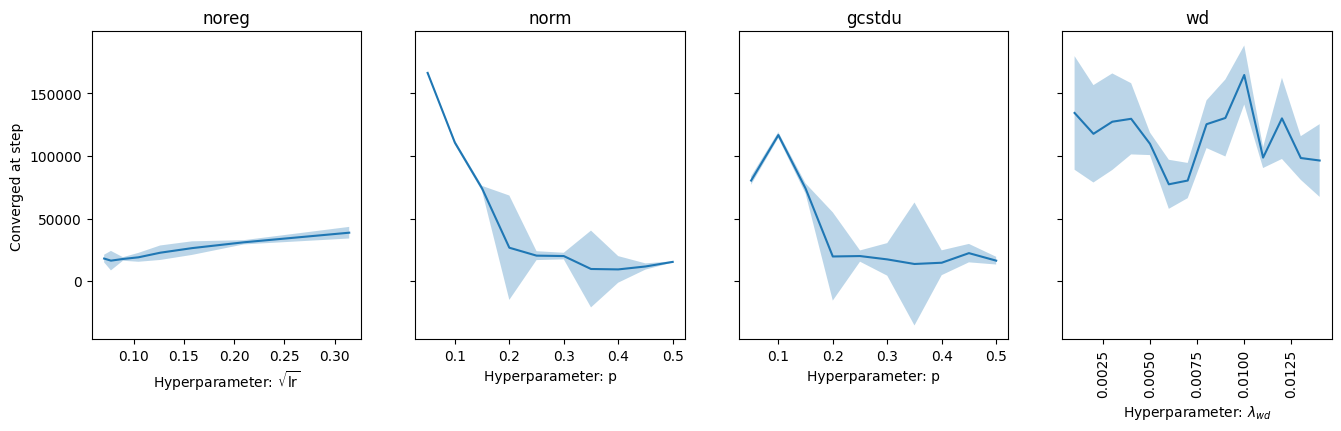

In [10]:
fig,axs = plt.subplots(ncols=4,nrows=1,sharey="row")
fig.set_size_inches(16,4)

x,y,_ = plot_hyperparam_y(get_subexpspaths("../../data/sgdm_wbn/standard"),
                               lambda subpath: np.sqrt(float(subpath)),lambda p : estimate_convergence(get_stats(p,"test_stats")["acc"])[0],axs[0], norm=False)
axs[0].set_title("noreg")
axs[0].set_ylabel("Converged at step")
axs[0].set_xlabel(r"Hyperparameter: $\sqrt{\text{lr}}$")

x,y,_ = plot_hyperparam_y(get_subexpspaths("../../data/sgdm_wbn/norm",skip=lambda s : s.endswith("0")),
                               lambda subpath: float(subpath.split("_")[0]),lambda p : estimate_convergence(get_stats(p,"test_stats")["acc"])[0], axs[1], norm=False)
axs[1].set_title("norm")
axs[1].set_xlabel("Hyperparameter: p")

x,y,_ = plot_hyperparam_y(get_subexpspaths("../../data/sgdm_wbn/gcstdu"),
                               lambda subpath: float(subpath.split("_")[0]),lambda p : estimate_convergence(get_stats(p,"test_stats")["acc"])[0], axs[2], norm=False)
axs[2].set_title("gcstdu")
axs[2].set_xlabel("Hyperparameter: p")

x,y,_ = plot_hyperparam_y(get_subexpspaths("../../data/sgdm_wbn/wd"),
                               lambda subpath: float(subpath),lambda p : estimate_convergence(get_stats(p,"test_stats")["acc"])[0], axs[3], norm=False)
axs[3].set_title("wd")
axs[3].set_xlabel(r"Hyperparameter: $\lambda_{wd}$")
axs[3].tick_params(axis='x', labelrotation=90)


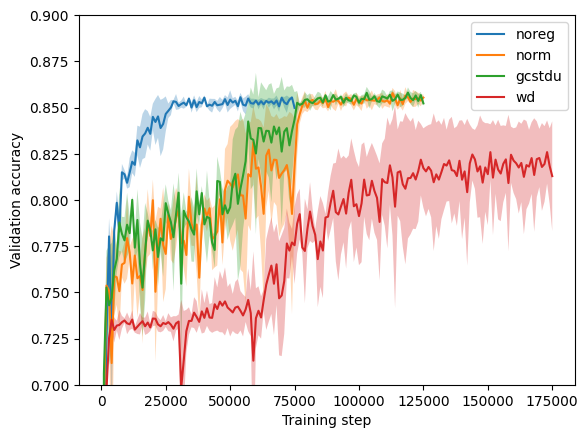

In [11]:
stats = get_stats("../../data/sgdm_wbn/standard/0.025","test_stats")
plot_step_stat(stats["acc"],plt,label="noreg")

stats = get_stats("../../data/sgdm_wbn/norm/0.15_1","test_stats")
plot_step_stat(stats["acc"],plt,label="norm")

stats = get_stats("../../data/sgdm_wbn/gcstdu/0.15_1","test_stats")
plot_step_stat(stats["acc"],plt,label="gcstdu")

stats = get_stats("../../data/sgdm_wbn/wd/0.002","test_stats")
plot_step_stat(stats["acc"],plt,label="wd")

plt.legend() 
ax = plt.gca()
ax.set_ylim(0.7,0.9) 
ax.set_xlabel("Training step")
ax.set_ylabel("Validation accuracy")
plt.savefig("./images/noreg_norm_gcstdu_wd_best_hyperparameter_accuracy.png", bbox_inches='tight')

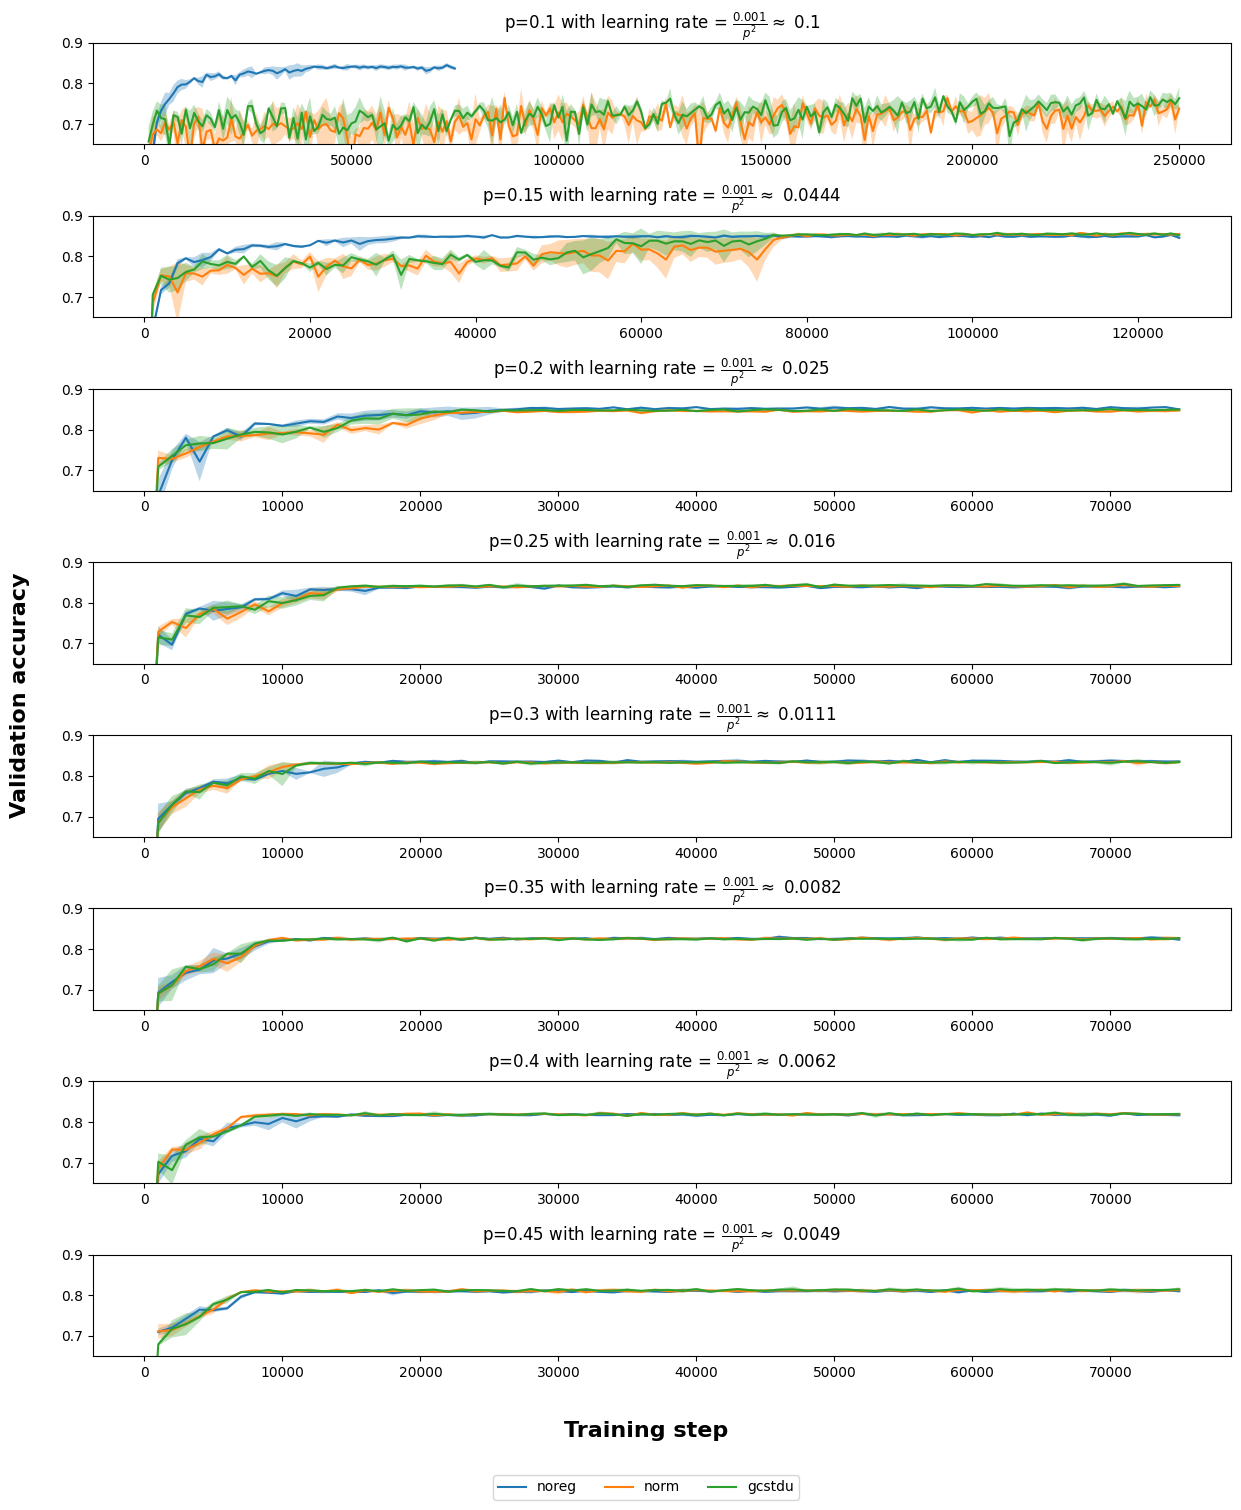

In [12]:
lrc = [("0.099","0.1"),("0.044","0.15"),("0.025","0.2"),("0.016","0.25"),("0.011","0.3"),("0.008","0.35"),("0.006","0.4"),("0.005","0.45")]

fig,axs = plt.subplots(ncols=1,nrows=len(lrc),sharey="all")

for (lr,c),ax in zip(lrc,axs):
    stats = get_stats("../../data/sgdm_wbn/standard/{0}".format(lr),"test_stats")
    plot_step_stat(stats["acc"],ax,label="noreg")

    stats = get_stats("../../data/sgdm_wbn/norm/{0}_1".format(c),"test_stats")
    plot_step_stat(stats["acc"],ax,label="norm")

    stats = get_stats("../../data/sgdm_wbn/gcstdu/{0}_1".format(c),"test_stats")
    plot_step_stat(stats["acc"],ax,label="gcstdu")

    ax.set_title(fr"p={c} with learning rate = $\frac{{0.001}}{{p^2}} \approx$ {round(0.001/(float(c)**2),4)}")
    ax.set_ylim(0.65,0.9) 


fig.text(0.5, -0.03, "Training step", ha='center', font={'size'   : 16,'weight' : 'bold'})
fig.text(-0.03, 0.5, "Validation accuracy", va='center', rotation='vertical',font={'size'   : 16,'weight' : 'bold'})

lines, labels = axs[0].get_legend_handles_labels()
fig.legend(lines, labels, loc='lower center', ncol=len(labels), bbox_to_anchor=(0.5,-0.08), bbox_transform=fig.transFigure)
fig.set_size_inches(12,14)
fig.tight_layout()
fig.savefig("./images/noreg_norm_gcstdu_accuracy.png", bbox_inches='tight',dpi=300)

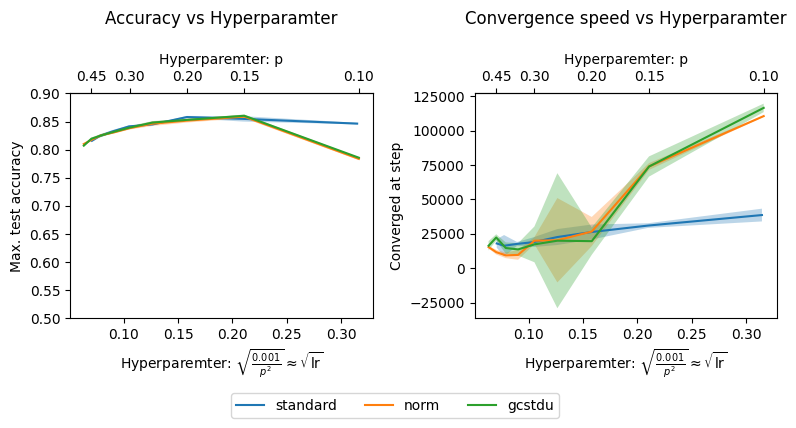

In [13]:
fig,axs = plt.subplots(ncols=2,nrows=1)
fig.set_size_inches(8,4)


x,y,_ = plot_hyperparam_y(get_subexpspaths("../../data/sgdm_wbn/standard"),
                               lambda subpath: np.sqrt(float(subpath)),lambda p : max_acc(get_stats(p,"test_stats")), axs[0], norm=False,label="standard")

x,y,_ = plot_hyperparam_y(get_subexpspaths("../../data/sgdm_wbn/norm",skip=lambda s : s.endswith("0") or float(s.split("_")[0]) < 0.1),
                               lambda subpath: np.sqrt(0.001/(float(subpath.split("_")[0]))**2),lambda p : max_acc(get_stats(p,"test_stats")), axs[0], norm=False,label="norm")

x,y,_ = plot_hyperparam_y(get_subexpspaths("../../data/sgdm_wbn/gcstdu",skip=lambda s : float(s.split("_")[0]) < 0.1),
                               lambda subpath: np.sqrt(0.001/(float(subpath.split("_")[0]))**2),lambda p : max_acc(get_stats(p,"test_stats")), axs[0], norm=False,label="gcstdu")

axs[0].set_xlabel(r"Hyperparemter: $\sqrt{\frac{0.001}{p^2}} \approx \sqrt{\text{lr}}$")
axs[0].set_ylim(0.5,0.9) 
axs[0].set_ylabel("Max. test accuracy")
axs[0].set_title("Accuracy vs Hyperparamter",pad=50)

x,y,_ = plot_hyperparam_y(get_subexpspaths("../../data/sgdm_wbn/standard"),
                               lambda subpath: np.sqrt(float(subpath)),lambda p : estimate_convergence(get_stats(p,"test_stats")["acc"])[0], axs[1], norm=False,label="standard")

x,y,_ = plot_hyperparam_y(get_subexpspaths("../../data/sgdm_wbn/norm",skip=lambda s : s.endswith("0") or float(s.split("_")[0]) < 0.1),
                               lambda subpath: np.sqrt(0.001/((float(subpath.split("_")[0]))**2)),lambda p : estimate_convergence(get_stats(p,"test_stats")["acc"])[0], axs[1], norm=False,label="norm")

x,y,_ = plot_hyperparam_y(get_subexpspaths("../../data/sgdm_wbn/gcstdu",skip=lambda s : float(s.split("_")[0]) < 0.1),
                               lambda subpath: np.sqrt(0.001/((float(subpath.split("_")[0]))**2)),lambda p : estimate_convergence(get_stats(p,"test_stats")["acc"])[0], axs[1], norm=False,label="gcstdu")


secx = axs[0].secondary_xaxis('top', functions=(lambda x: np.sqrt(0.001/(x**2+1e-7)), lambda x: np.sqrt(0.001/(x**2+1e-7))))
secx.set_ticks([0.1,0.15,0.2,0.3,0.45])
secx.set_xlabel("Hyperparemter: p")

secx = axs[1].secondary_xaxis('top', functions=(lambda x: np.sqrt(0.001/(x**2+1e-7)), lambda x: np.sqrt(0.001/(x**2+1e-7))))
secx.set_ticks([0.1,0.15,0.2,0.3,0.45])
secx.set_xlabel("Hyperparemter: p")

axs[1].set_xlabel(r"Hyperparemter: $\sqrt{\frac{0.001}{p^2}} \approx \sqrt{\text{lr}}$")
axs[1].set_ylabel("Converged at step")
axs[1].set_title("Convergence speed vs Hyperparamter",pad=50)

lines, labels = axs[1].get_legend_handles_labels()
fig.legend(lines, labels, loc='lower center', ncol=len(labels), bbox_to_anchor=(0.5,-0.075), bbox_transform=fig.transFigure)
fig.tight_layout()

fig.savefig("./images/noreg_norm_gcstdu_hyperparameter_best_accuracy_convergence.png", bbox_inches='tight')

In [14]:
0.001/(0.2**2)

0.024999999999999994

standard optimal hps: vgg11: 0.025 | vgg11_div4: 0.044 | vgg11_div8: 0.044 with acc mappings: vgg11: 85.8% | vgg11_div4: 85.47% | vgg11_div8: 85.47%
standard & 0.025 & 0.044 & 0.044 & 85.8\% & 85.47\% & 85.47 \% \\
norm optimal hps: vgg11: 0.15 | vgg11_div4: 0.3 | vgg11_div8: 0.3 with acc mappings: vgg11: 85.87% | vgg11_div4: 83.83% | vgg11_div8: 83.83%
norm & 0.15 & 0.3 & 0.3 & 85.87\% & 83.83\% & 83.83 \% \\
gcstdu optimal hps: vgg11: 0.15 | vgg11_div4: 0.3 | vgg11_div8: 0.3 with acc mappings: vgg11: 86.02% | vgg11_div4: 83.92% | vgg11_div8: 83.92%
gcstdu & 0.15 & 0.3 & 0.3 & 86.02\% & 83.92\% & 83.92 \% \\
wd optimal hps: vgg11: 0.002 | vgg11_div4: 0.001 | vgg11_div8: 0.013 with acc mappings: vgg11: 82.83% | vgg11_div4: 82.71% | vgg11_div8: 79.77%
wd & 0.002 & 0.001 & 0.013 & 82.83\% & 82.71\% & 79.77 \% \\


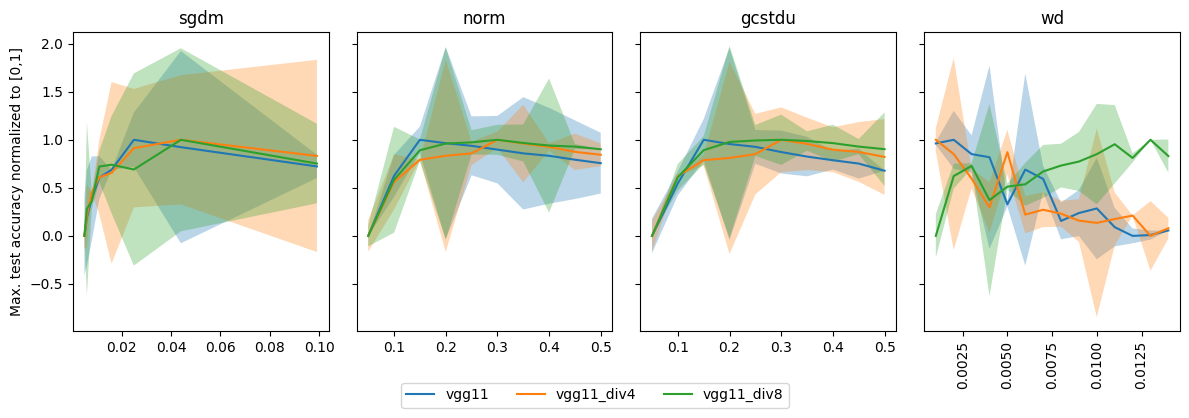

In [15]:

def _print_some_stats(s,x,y,y_normed,x_div4,y_div4,y_normed_div4,x_div8,y_div8,y_normed_div8):
    optimal_hp = x[y.argmax()]
    optimal_hp_div4 = x_div4[y_div4.argmax()]
    optimal_hp_div8 = x_div8[y_div8.argmax()]
    optimal_hp_maxacc = np.round(100*y[np.where(x == optimal_hp)][0],2)
    optimal_hp_div4_map_maxacc = np.round(100*y[np.where(x == optimal_hp_div4)][0],2)
    optimal_hp_div8_map_maxacc = np.round(100*y[np.where(x == optimal_hp_div8)][0],2)
    print("{0} optimal hps: vgg11: {1} | vgg11_div4: {2} | vgg11_div8: {3} with acc mappings: vgg11: {4}% | vgg11_div4: {5}% | vgg11_div8: {6}%".format(s,optimal_hp,optimal_hp_div4,optimal_hp_div8,optimal_hp_maxacc,optimal_hp_div4_map_maxacc,optimal_hp_div8_map_maxacc))
    print("{0} & {1} & {2} & {3} & {4}\\% & {5}\\% & {6} \\% \\\\".format(s,optimal_hp,optimal_hp_div4,optimal_hp_div8,optimal_hp_maxacc,optimal_hp_div4_map_maxacc,optimal_hp_div8_map_maxacc))


# Compare normal accuracy to accuracy over slim runs
fig,axs = plt.subplots(ncols=4,nrows=1,sharey="row")
fig.set_size_inches(12,4)
axs[0].set_ylabel("Max. test accuracy normalized to [0,1]")

x,y,y_normed = plot_hyperparam_y(get_subexpspaths("../../data/sgdm_wbn/standard"),lambda subpath: float(subpath),lambda p : max_acc(get_stats(p,"test_stats")), axs[0], "standard")
x_div4,y_div4,y_normed_div4 = plot_hyperparam_y(get_subexpspaths("../../data/sgdm_wbn/standard_div4"),lambda subpath: float(subpath),lambda p : max_acc(get_stats(p,"test_stats")), axs[0], "standard_div4")
x_div8,y_div8,y_normed_div8 = plot_hyperparam_y(get_subexpspaths("../../data/sgdm_wbn/standard_div8"),lambda subpath: float(subpath),lambda p : max_acc(get_stats(p,"test_stats")), axs[0], "standard_div8")
_print_some_stats("standard",x,y,y_normed,x_div4,y_div4,y_normed_div4,x_div8,y_div8,y_normed_div8)

axs[0].set_title("sgdm")

x,y,y_normed = plot_hyperparam_y(get_subexpspaths("../../data/sgdm_wbn/norm",skip=lambda s : s.endswith("0")),lambda subpath: float(subpath.split("_")[0]),
                                 lambda p : max_acc(get_stats(p,"test_stats")), axs[1], "norm")
x_div4,y_div4,y_normed_div4 = plot_hyperparam_y(get_subexpspaths("../../data/sgdm_wbn/norm_div4"),lambda subpath: float(subpath.split("_")[0]),
                                           lambda p : max_acc(get_stats(p,"test_stats")), axs[1], "norm_div4")
x_div8,y_div8,y_normed_div8 = plot_hyperparam_y(get_subexpspaths("../../data/sgdm_wbn/norm_div8"),lambda subpath: float(subpath.split("_")[0]),
                                           lambda p : max_acc(get_stats(p,"test_stats")), axs[1], "norm_div8")
_print_some_stats("norm",x,y,y_normed,x_div4,y_div4,y_normed_div4,x_div8,y_div8,y_normed_div8)

axs[1].set_title("norm")

x,y,y_normed = plot_hyperparam_y(get_subexpspaths("../../data/sgdm_wbn/gcstdu/"),lambda subpath: float(subpath.split("_")[0]),
                                 lambda p : max_acc(get_stats(p,"test_stats")), axs[2], "gcstdu")
x_div4,y_div4,y_normed_div4 = plot_hyperparam_y(get_subexpspaths("../../data/sgdm_wbn/gcstdu_div4/"),lambda subpath: float(subpath.split("_")[0]),
                                           lambda p : max_acc(get_stats(p,"test_stats")), axs[2], "gcstdu_div4")
x_div8,y_div8,y_normed_div8 = plot_hyperparam_y(get_subexpspaths("../../data/sgdm_wbn/gcstdu_div8/"),lambda subpath: float(subpath.split("_")[0]),
                                           lambda p : max_acc(get_stats(p,"test_stats")), axs[2], "gcstdu_div8")
_print_some_stats("gcstdu",x,y,y_normed,x_div4,y_div4,y_normed_div4,x_div8,y_div8,y_normed_div8)

axs[2].set_title("gcstdu")

x,y,y_normed  = plot_hyperparam_y(get_subexpspaths("../../data/sgdm_wbn/wd"),lambda subpath: float(subpath),lambda p : max_acc(get_stats(p,"test_stats")), axs[3], "wd")
x_div4,y_div4,y_normed_div4 = plot_hyperparam_y(get_subexpspaths("../../data/sgdm_wbn/wd_div4"),lambda subpath: float(subpath),lambda p : max_acc(get_stats(p,"test_stats")), axs[3], "wd_div4")
x_div8,y_div8,y_normed_div8 = plot_hyperparam_y(get_subexpspaths("../../data/sgdm_wbn/wd_div8"),lambda subpath: float(subpath),lambda p : max_acc(get_stats(p,"test_stats")), axs[3], "wd_div8")
_print_some_stats("wd",x,y,y_normed,x_div4,y_div4,y_normed_div4,x_div8,y_div8,y_normed_div8)

axs[3].set_title("wd")
axs[3].tick_params(axis='x', labelrotation=90)

lines, _ = axs[0].get_legend_handles_labels()
labels = ["vgg11", "vgg11_div4", "vgg11_div8"]
fig.legend(lines, labels, loc='lower center', ncol=len(labels), bbox_to_anchor=(0.5,-0.05), bbox_transform=fig.transFigure)
fig.tight_layout()


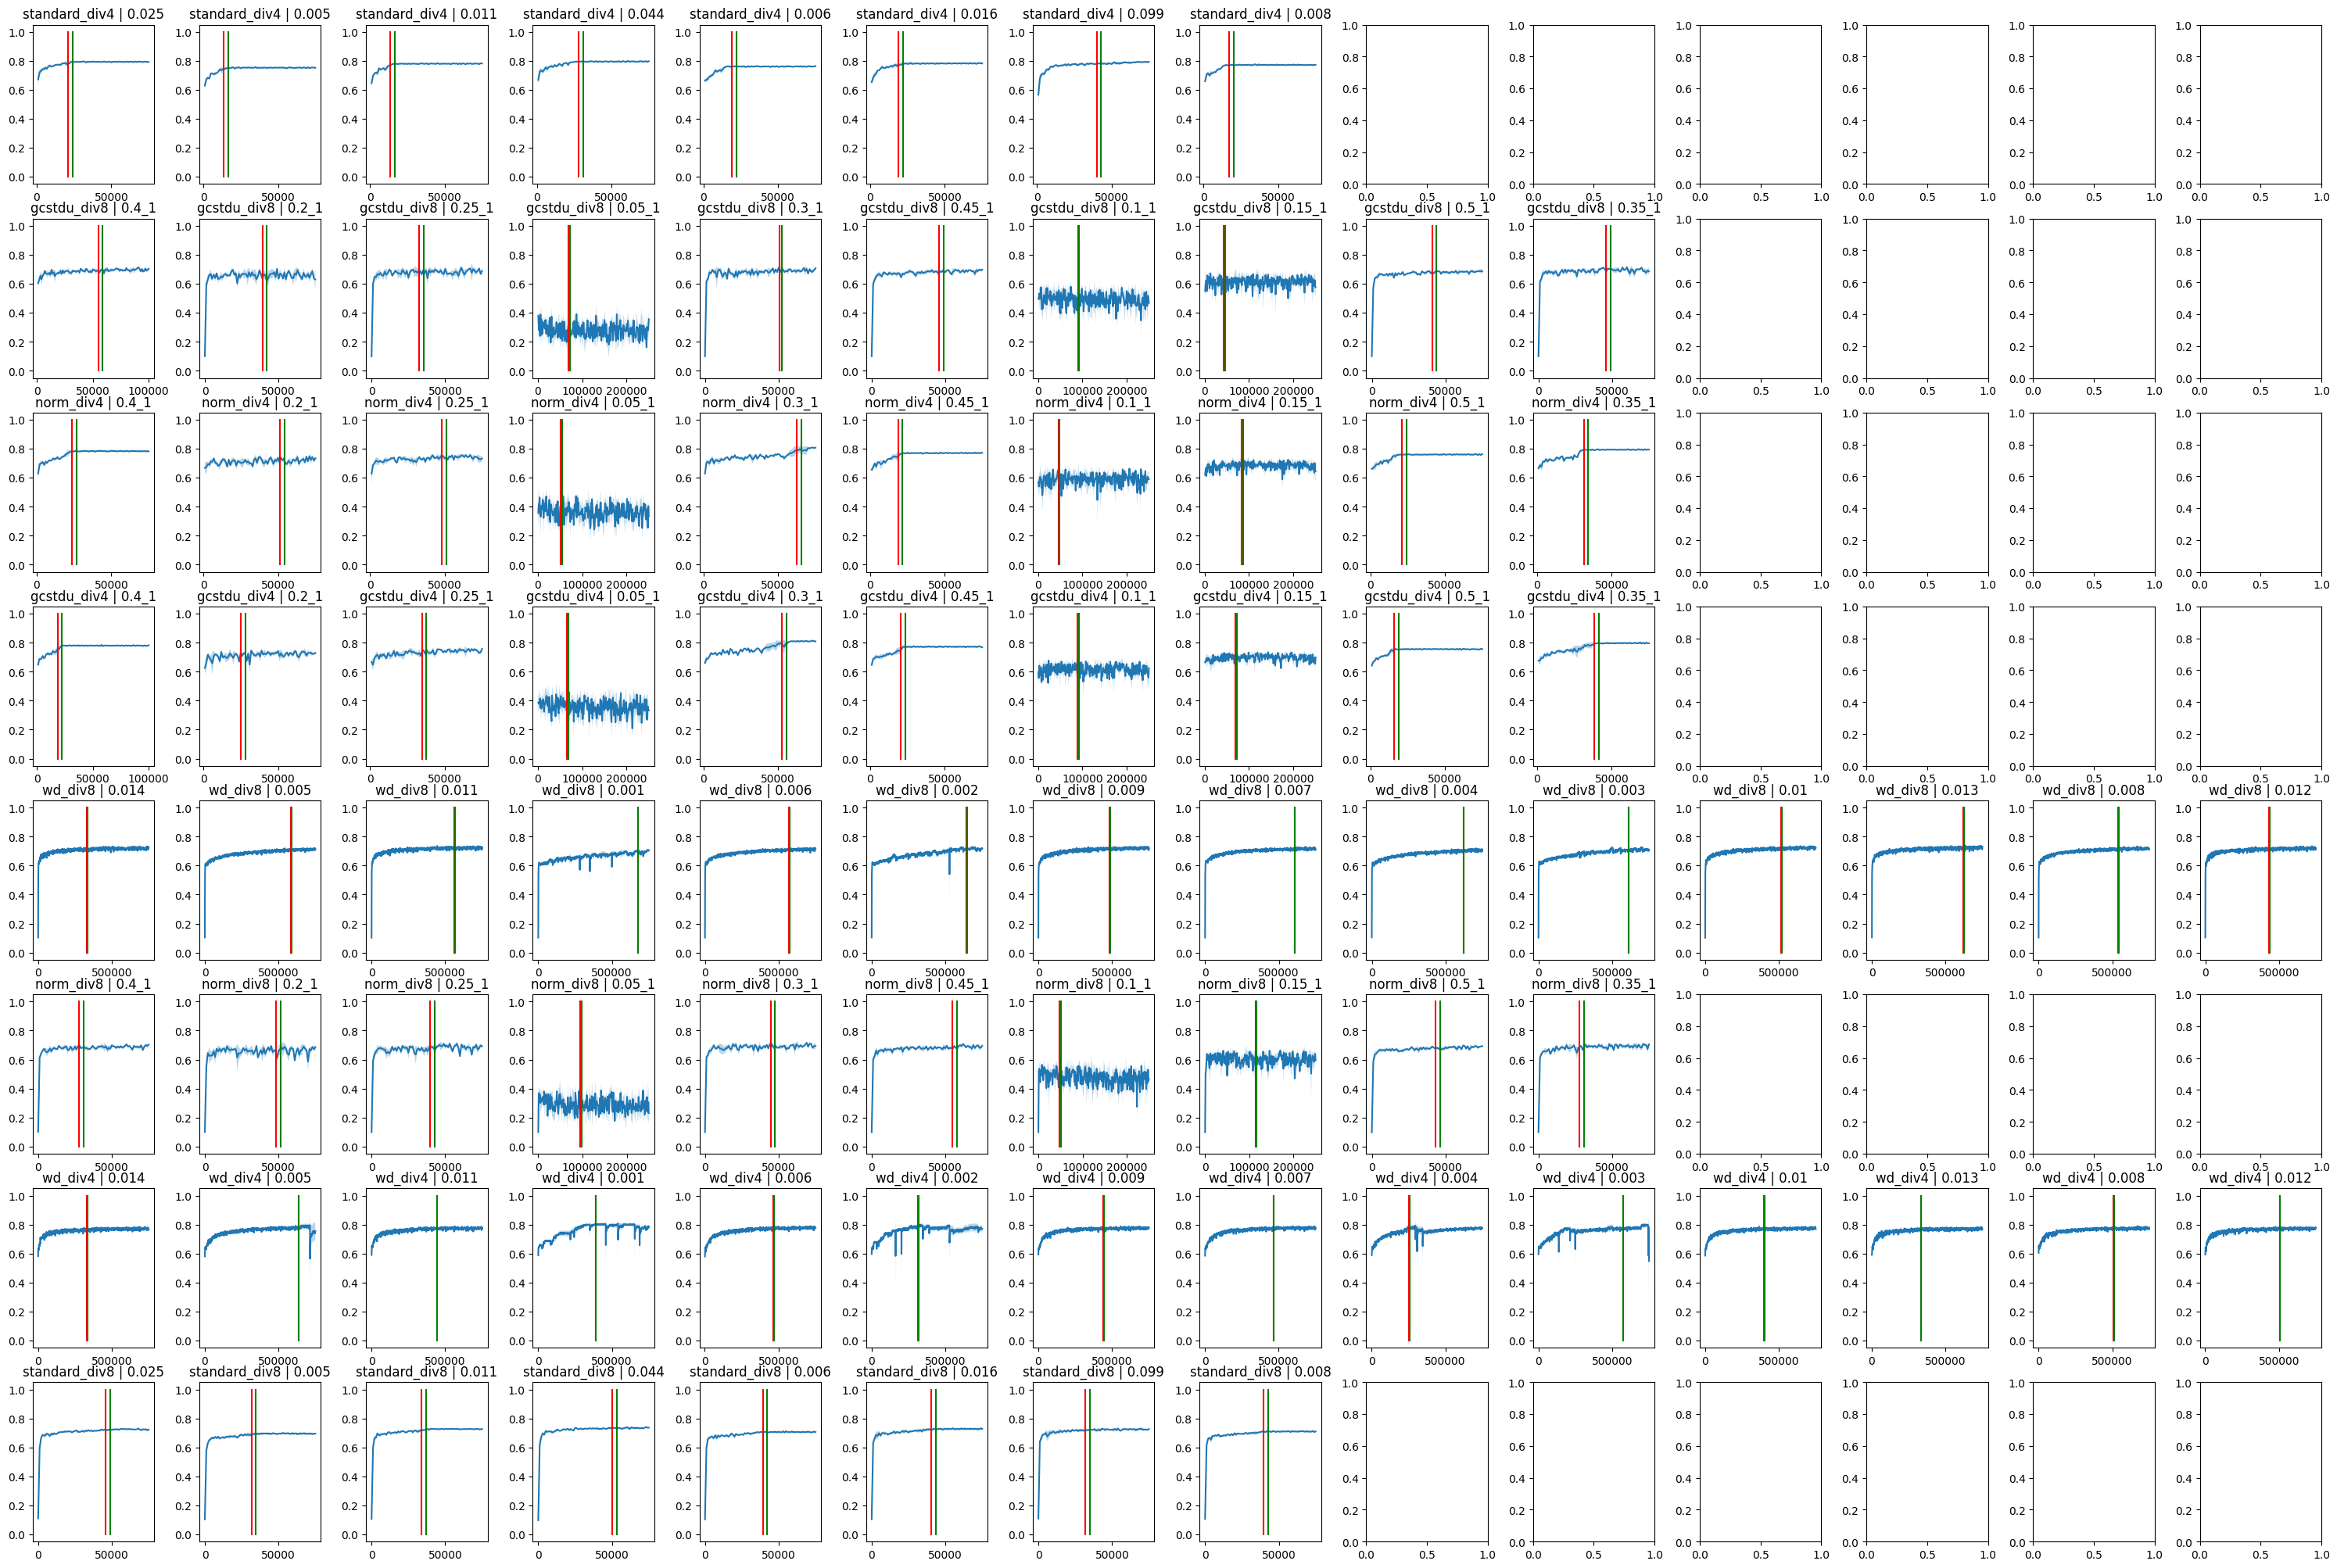

In [16]:


exps = {exp : list(get_subexpspaths(os.path.join("../../data/sgdm_wbn",exp))) for exp in os.listdir("../../data/sgdm_wbn") if "_div" in exp}
nrows = len(list(exps.keys()))
ncols = max([len(subexppaths) for subexppaths in exps.values()])

fig,axs = plt.subplots(ncols=ncols,nrows=nrows)
fig.set_size_inches(30,20)
fig.tight_layout()
for row,(exp,subexps) in zip(axs,exps.items()):
    for col,(path,subpath) in zip(row,subexps):
        test_acc = get_stats(path,"test_stats")["acc"]
        plot_step_stat(test_acc,col)

        convergence = np.mean(estimate_convergence(test_acc)[1])
        col.plot([convergence,convergence],[0,1],c="red")

        convergence = np.mean(estimate_convergence(test_acc)[0])
        col.plot([convergence,convergence],[0,1],c="green")
        col.set_title("{0} | {1}".format(exp,subpath))

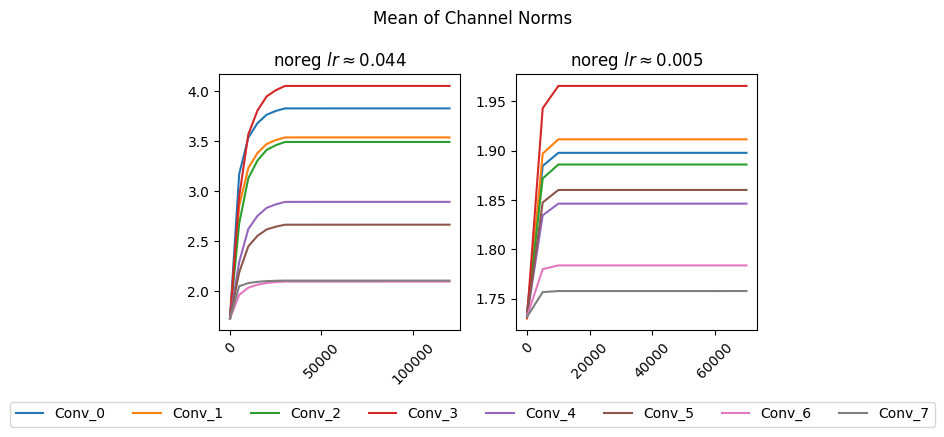

In [17]:
fig,axs = plt.subplots(ncols = 2, nrows = 1)

plot_fn = lambda i : lambda d :  {0 :    {
                                i :  
                                ("Mean of output channel norms per layer", d["cnorm_mean"]) , 
                            }}


_ = plot_data("../../data/sgdm_wbn/standard/0.044",plot_fn(0),start=0,axs_tuple=(fig,axs,2,1))
_ = plot_data("../../data/sgdm_wbn/standard/0.005",plot_fn(1),start=0,axs_tuple=(fig,axs,2,1))

fig.set_size_inches(6,4)
fig.suptitle("Mean of Channel Norms")
axs[0].set_title(r"noreg $lr \approx 0.044$")
axs[1].set_title(r"noreg $lr \approx 0.005$")
axs[0].tick_params(axis='x', labelrotation=45)
axs[1].tick_params(axis='x', labelrotation=45)

lines, labels = axs[0].get_legend_handles_labels()
fig.legend(lines, labels, loc='lower center', ncol=len(labels), bbox_to_anchor=(0.5,-0.08), bbox_transform=fig.transFigure)
fig.tight_layout()
fig.savefig("./images/noreg_0.044_vs_noreg_0.005_cnorm_mean.png", bbox_inches='tight')
plt.show()


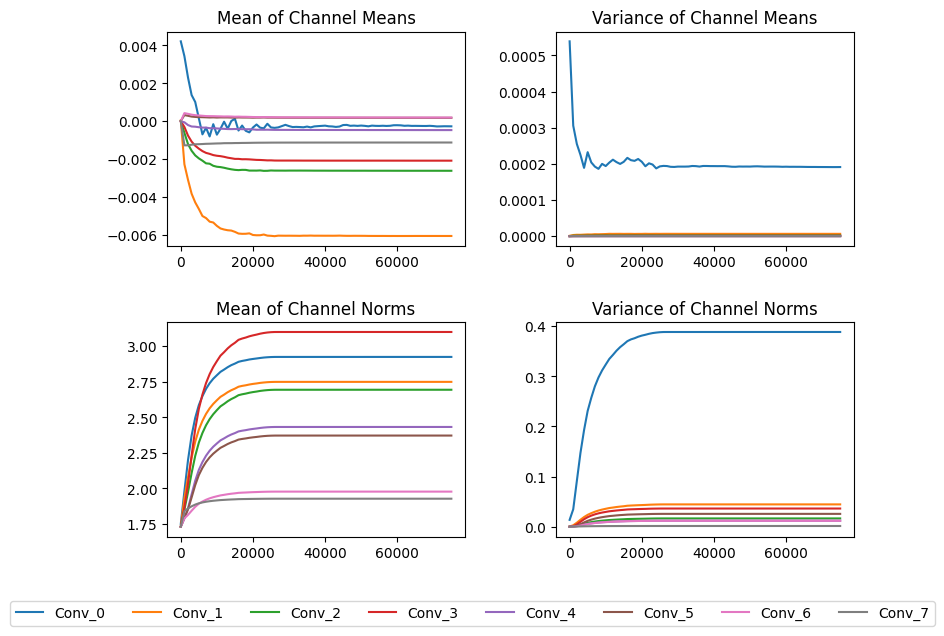

In [18]:
fig,axs = plot_data("../../data/sgdm_wbn/standard/0.025", lambda d :     
                    {0 :    {
                            0 :  
                                ("Mean of Channel Means", d["cmean_mean"]) , 
                            1 :  
                                ("Variance of Channel Means", d["cmean_var"]) 
                            },
                    1 :    {
                            0 :  
                                ("Mean of Channel Norms", d["cnorm_mean"]) , 
                            1 :  
                                ("Variance of Channel Norms", d["cnorm_var"]) 
                            }})

fig.tight_layout()
fig.set_size_inches(8,6)
lines, labels = axs[0][0].get_legend_handles_labels()

fig.legend(lines, labels, loc='lower center', ncol=len(labels), bbox_to_anchor=(0.5,-0.08), bbox_transform=fig.transFigure)
fig.savefig("./images/noreg_0.025_cmeans_cnorms.png", bbox_inches='tight')

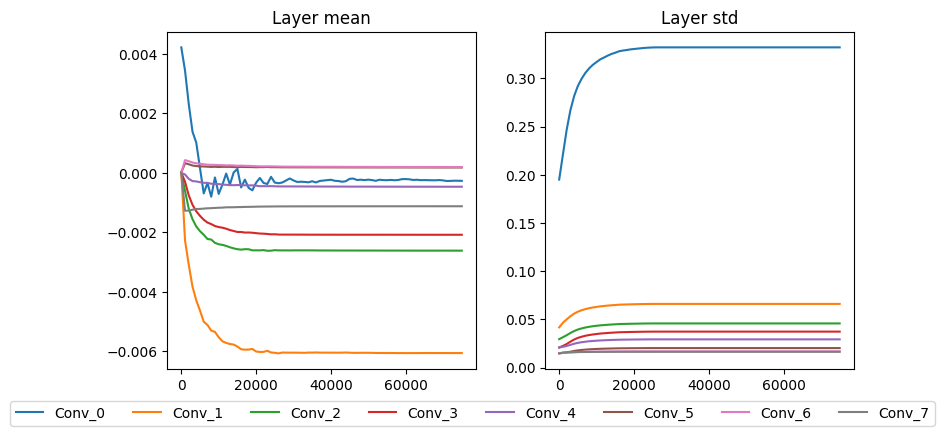

In [19]:
fig,axs = plot_data("../../data/sgdm_wbn/standard/0.025", lambda d :     
                    {0 :    {
                            0 :  
                                ("Layer mean", d["mean"]) , 
                            1 :  
                                ("Layer std", d["std"]) 
                            }})

fig.tight_layout()
fig.set_size_inches(8,4)
lines, labels = axs[0].get_legend_handles_labels()
fig.legend(lines, labels, loc='lower center', ncol=len(labels), bbox_to_anchor=(0.5,-0.08), bbox_transform=fig.transFigure)
fig.savefig("./images/noreg_0.025_lmean_lstd.png", bbox_inches='tight')

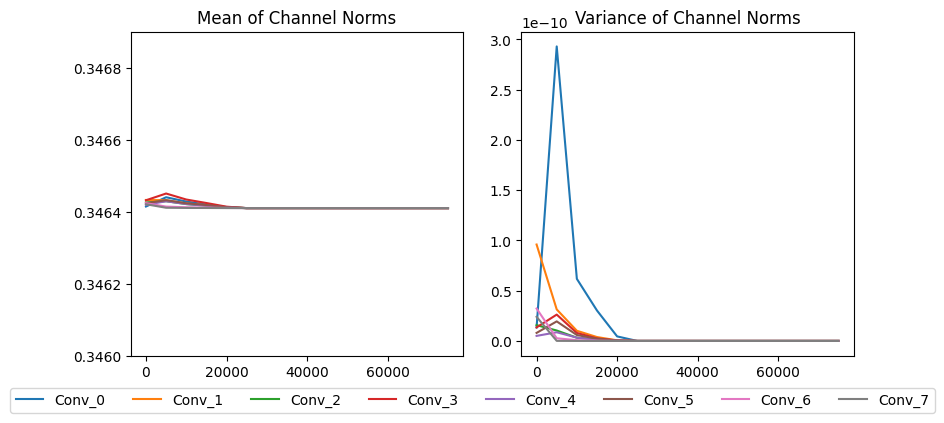

In [20]:
fig,axs = plot_data("../../data/sgdm_wbn/norm/0.2_1", lambda d :     
                    {0 :    {
                            0 :  
                                ("Mean of Channel Norms", d["cnorm_mean"]) , 
                            1 :  
                                ("Variance of Channel Norms", d["cnorm_var"]) 
                            }})

fig.tight_layout()
fig.set_size_inches(8,4)
lines, labels = axs[0].get_legend_handles_labels()
axs[0].set_ylim(0.346,0.3469)
fig.legend(lines, labels, loc='lower center', ncol=len(labels), bbox_to_anchor=(0.5,-0.08), bbox_transform=fig.transFigure)
fig.savefig("./images/norm_0.2_1_cnorms.png", bbox_inches='tight')

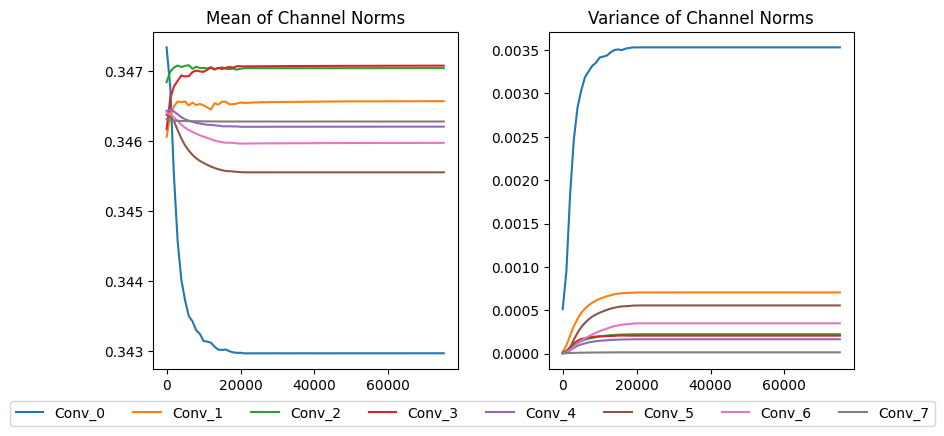

In [21]:
fig,axs = plot_data("../../data/sgdm_wbn/gcstdu/0.2_1", lambda d :     
                    {0 :    {
                            0 :  
                                ("Mean of Channel Norms", d["cnorm_mean"]) , 
                            1 :  
                                ("Variance of Channel Norms", d["cnorm_var"]) 
                            }})

fig.tight_layout()
fig.set_size_inches(8,4)
lines, labels = axs[0].get_legend_handles_labels()
fig.legend(lines, labels, loc='lower center', ncol=len(labels), bbox_to_anchor=(0.5,-0.08), bbox_transform=fig.transFigure)
fig.savefig("./images/gcstdu_0.2_1_cnorms.png", bbox_inches='tight')

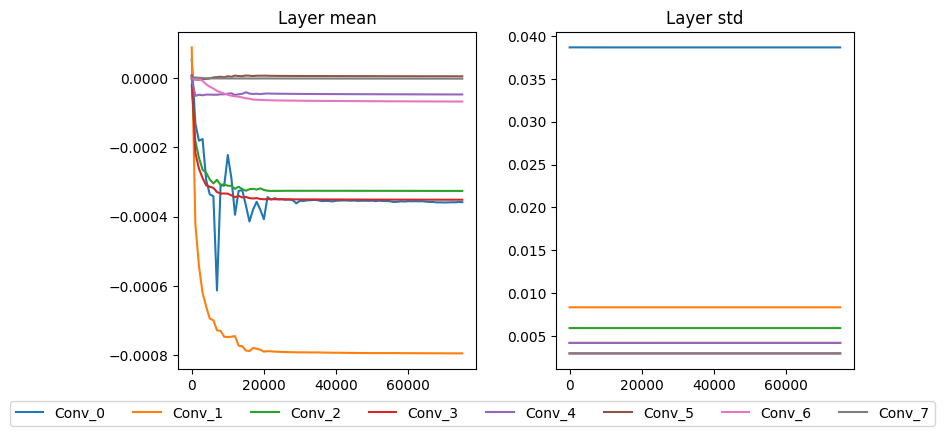

In [22]:
fig,axs = plot_data("../../data/sgdm_wbn/gcstdu/0.2_1", lambda d :     
                    {0 :    {
                            0 :  
                                ("Layer mean", d["mean"]) , 
                            1 :  
                                ("Layer std", d["std"]) 
                            }})

fig.tight_layout()
fig.set_size_inches(8,4)
lines, labels = axs[0].get_legend_handles_labels()
fig.legend(lines, labels, loc='lower center', ncol=len(labels), bbox_to_anchor=(0.5,-0.08), bbox_transform=fig.transFigure)
fig.savefig("./images/gcstdu_0.2_1_lmean_lstd.png", bbox_inches='tight')